In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#Import data
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Visual representation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
#Correlation
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\Anuja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

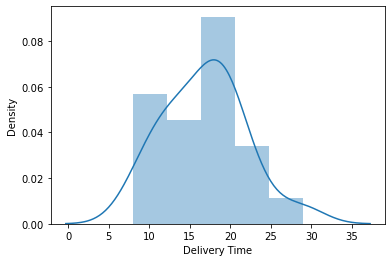

In [5]:
sns.distplot(data['Delivery Time'])

C:\Users\Anuja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

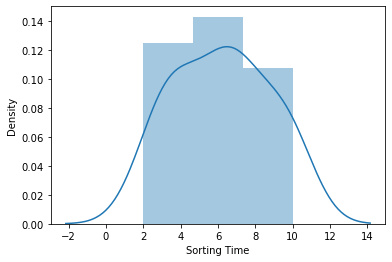

In [6]:
sns.distplot(data['Sorting Time'])

In [12]:
# Rename Columns
data=data.rename({'Delivery Time':'del_time', 'Sorting Time':'sort_time'},axis=1)
data.head()

,del_time,sort_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
Simple Linear Regression Concept
X- soring time as independent variable
y- Delivery time as dependent variable/predicted variable

In [13]:
#Prepare model
import statsmodels.formula.api as smf
model = smf.ols("del_time~sort_time",data = data).fit()

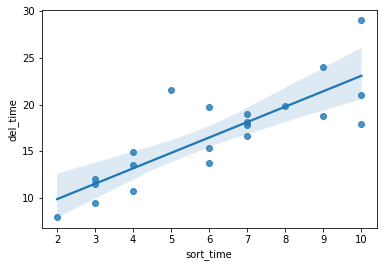

In [14]:
sns.regplot(x="sort_time", y="del_time", data=data);

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               del_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        21:58:27   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sort_time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Coefficients
model.params

Intercept    6.582734
sort_time    1.649020
dtype: float64

In [17]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept    3.823349
sort_time    6.387447
dtype: float64 
 Intercept    0.001147
sort_time    0.000004
dtype: float64


In [ ]:
Using Chi -square test pvalu is less than alpha(0.05)
==> We conclude that these two variable are related.

In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Prediction

In [21]:
# Manual prediction for say sorting time 10
delivery_time = (6.582734) + (1.649020)*(10)
delivery_time

23.072933999999997

In [27]:
#Predict for sorting time 5, 8
newdata=pd.Series([5,10])

In [28]:
newdata

0     5
1    10
dtype: int64

In [29]:
data_pred=pd.DataFrame(newdata,columns=['sort_time'])
data_pred

,sort_time
0,5
1,10


In [30]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64